
Processing year 2019


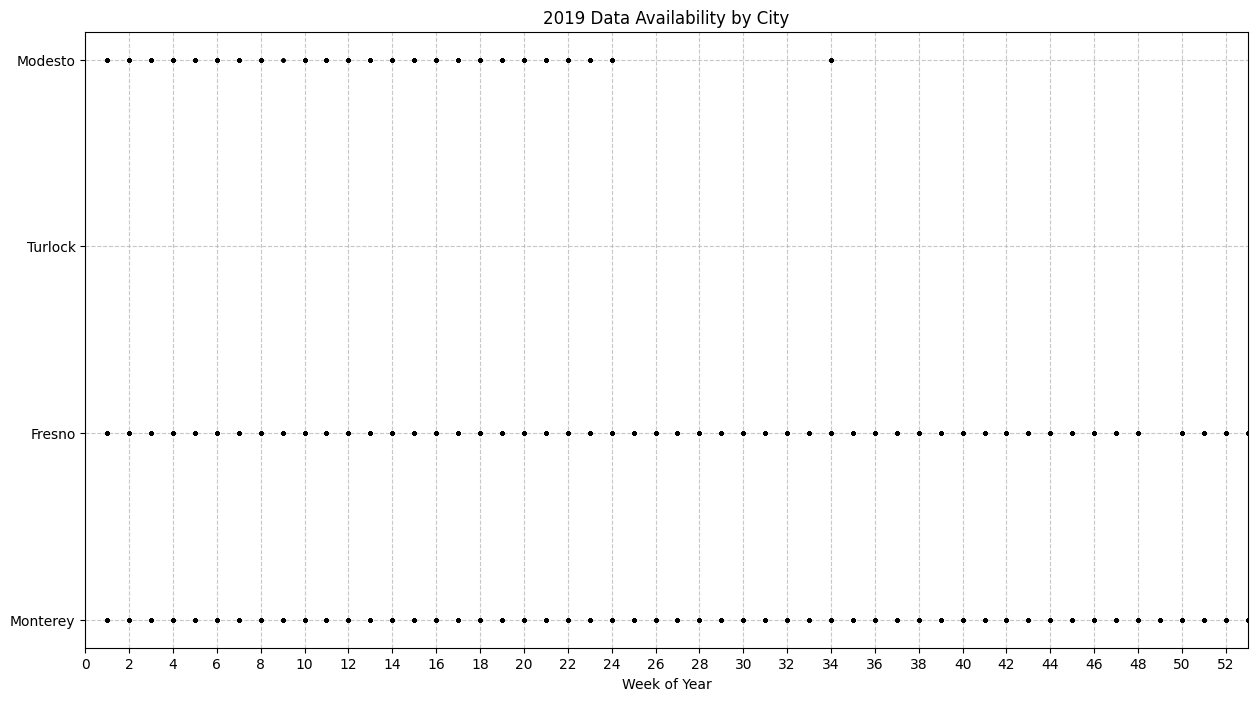


Processing year 2020


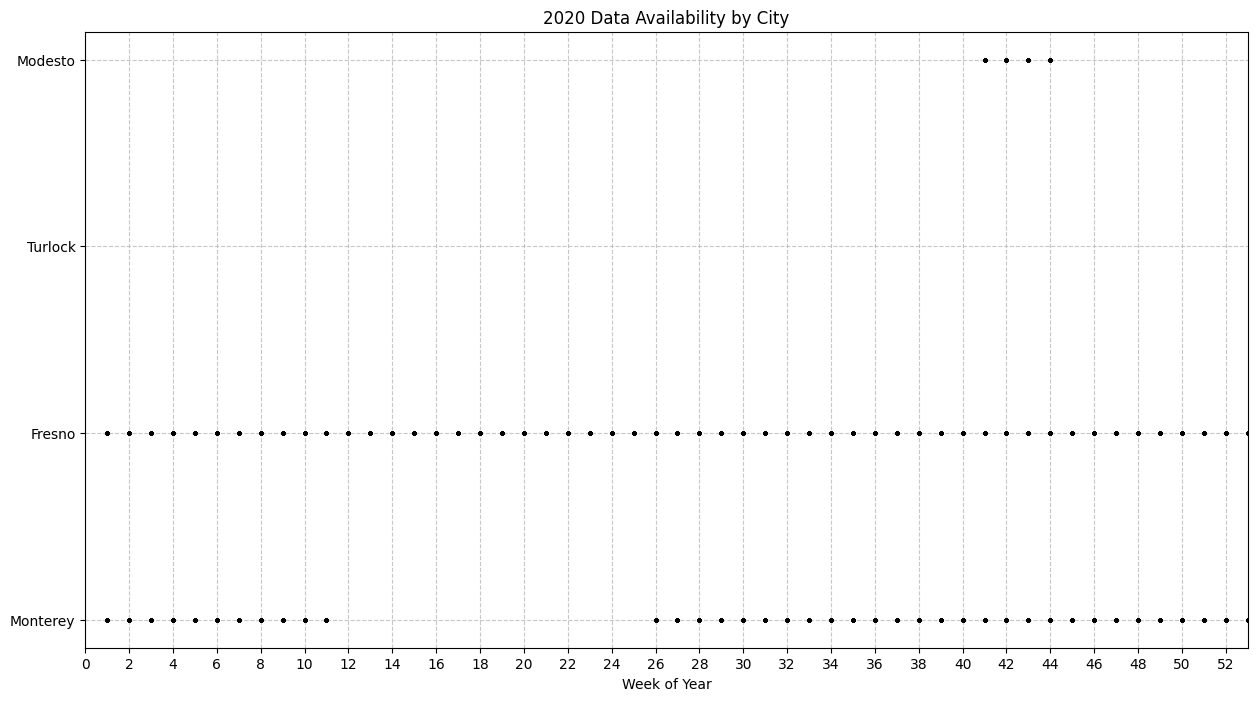


Processing year 2021


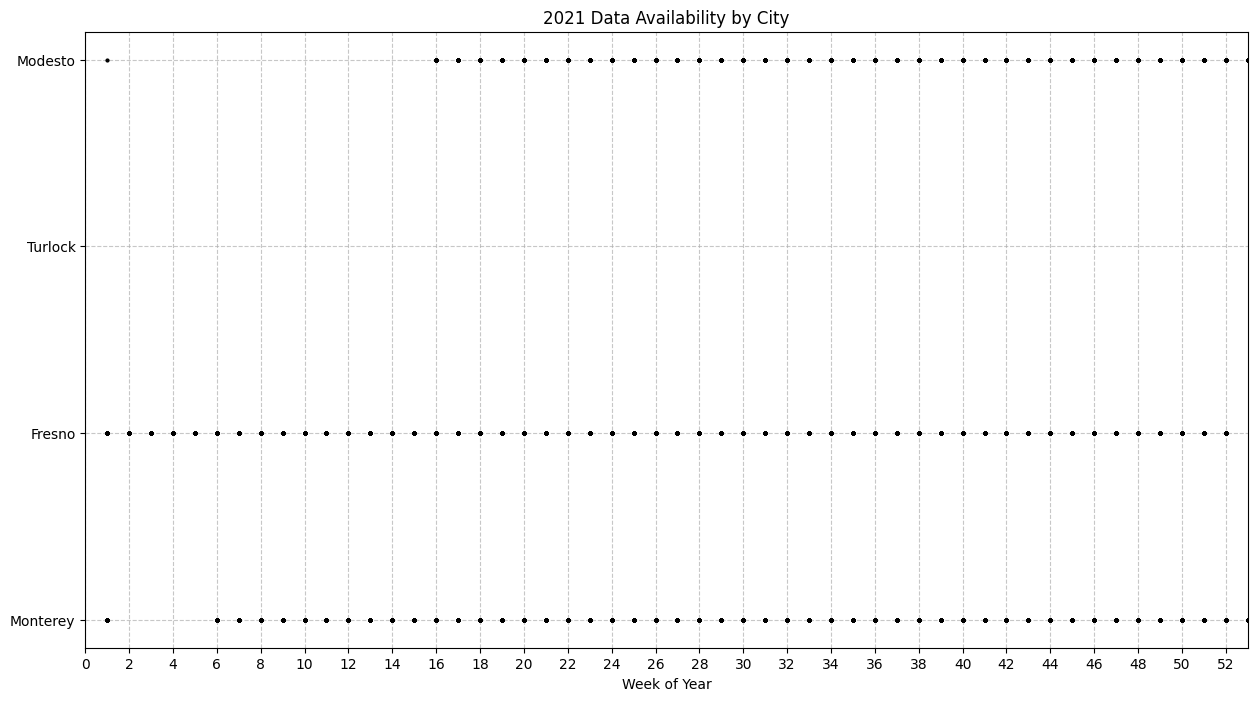


Processing year 2022


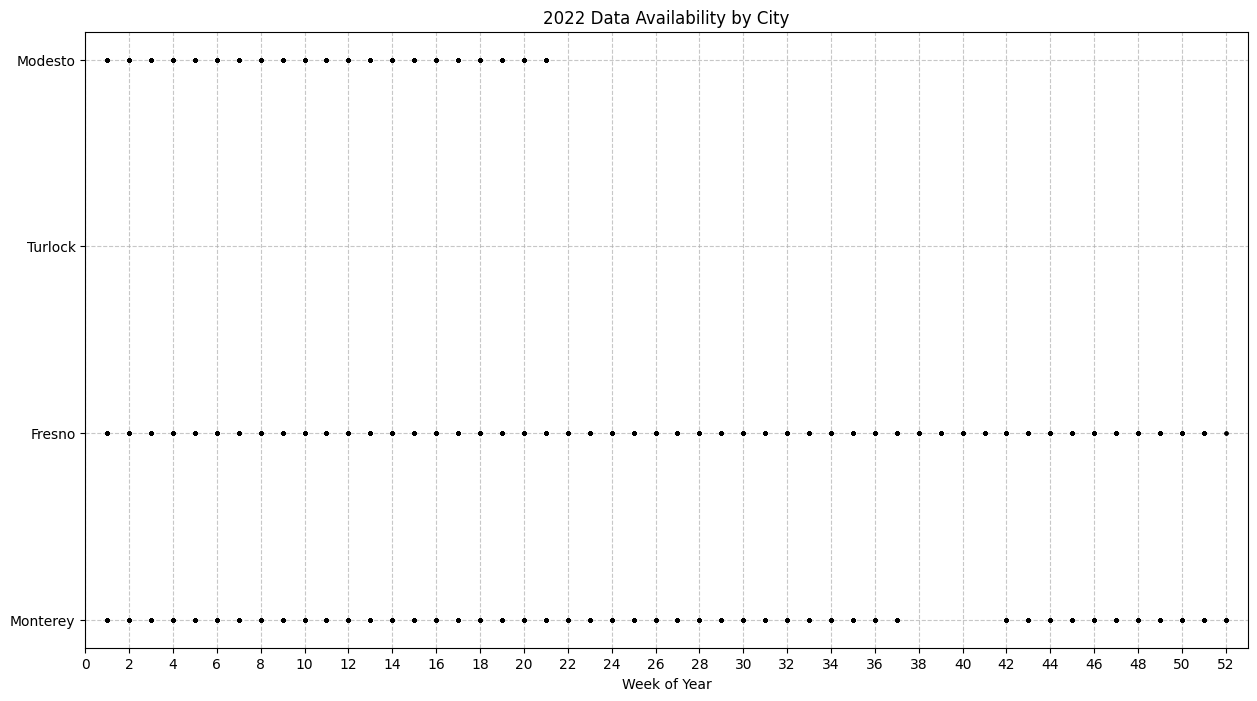


Processing year 2023


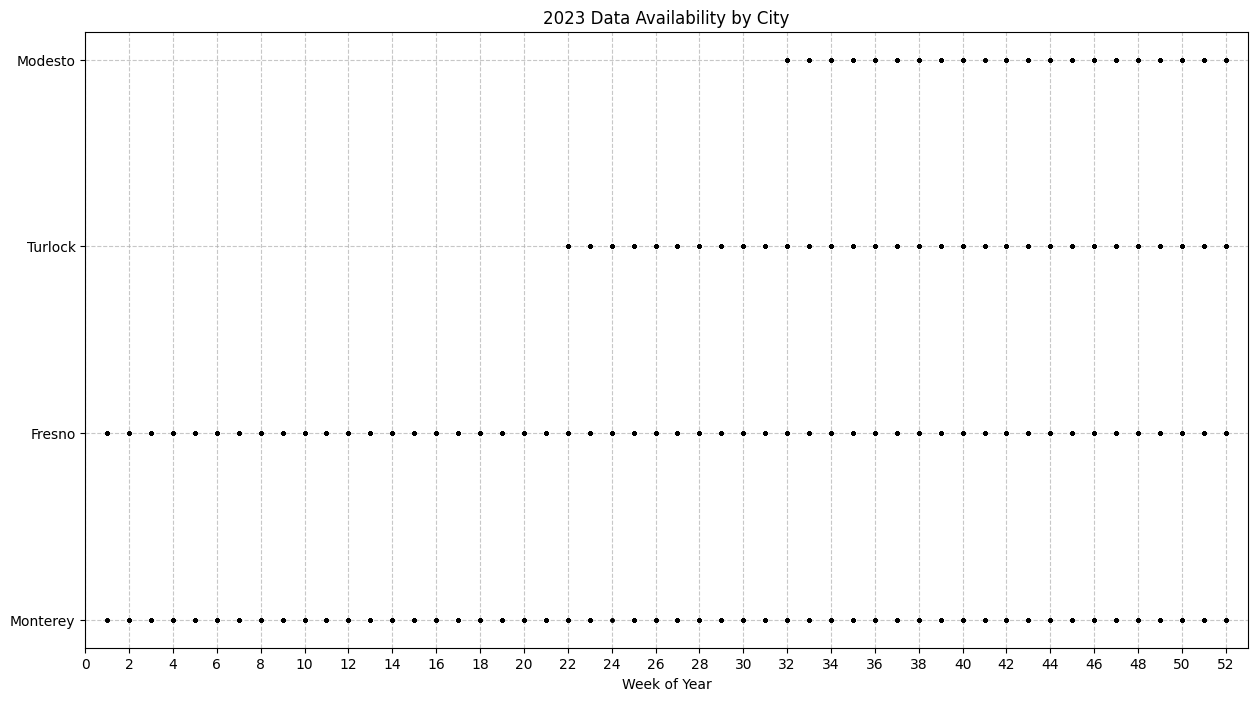


Processing year 2024


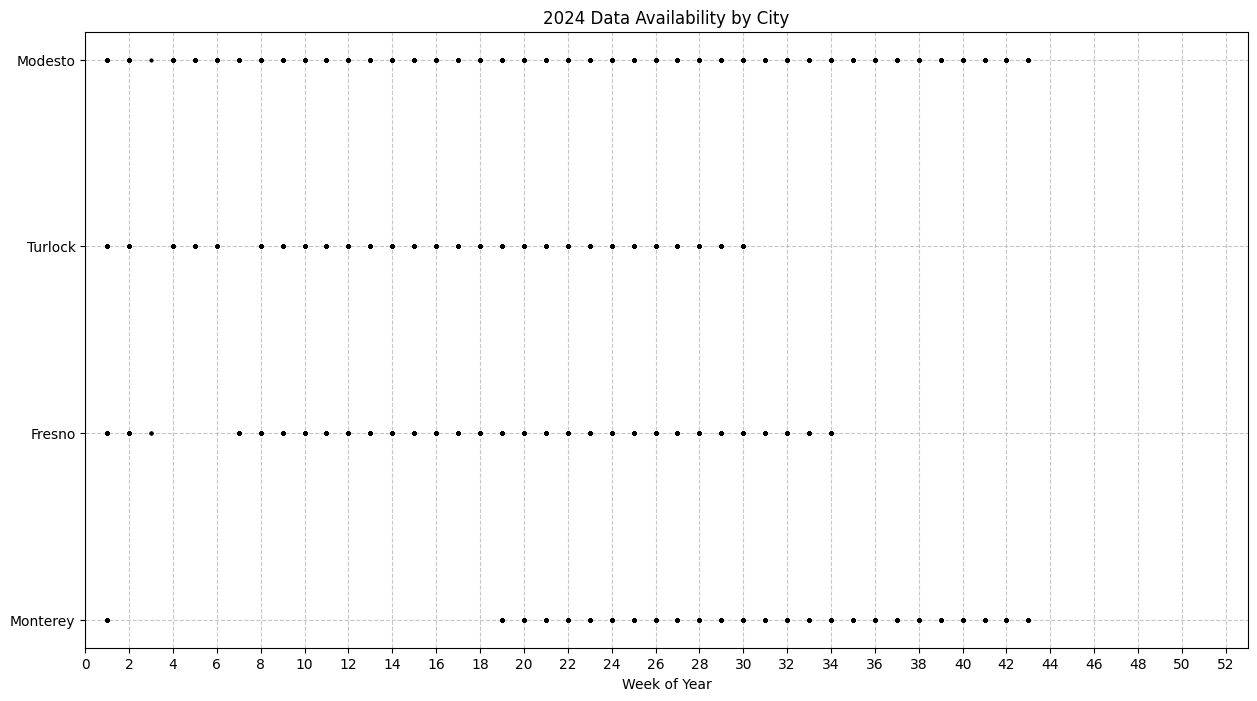

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
%matplotlib inline

def load_aeronet_data(filename):
    """Load AERONET data file and convert days to weeks"""
    if not os.path.exists(filename):
        return None
        
    try:
        # Skip the header rows and read the CSV data
        df = pd.read_csv(filename, skiprows=6)
        
        # Convert days to weeks (integer division by 7 and round up)
        days = df.iloc[:, 2].astype(float)  # Third column is Day_of_Year
        weeks = np.ceil(days / 7).astype(int)
        
        return weeks
    except Exception as e:
        print(f"Error loading {filename}: {str(e)}")
        return None

def create_year_plot(year):
    """Create plot for a specific year"""
    plt.figure(figsize=(15, 8))
    
    # Define cities and their y-positions
    cities = ['monterey', 'fresno', 'turlock', 'modesto']
    y_positions = range(len(cities))
    
    # Plot each city's data
    data_exists = False
    for i, city in enumerate(cities):
        filename = f'{year}_{city}'
        if os.path.exists(filename):
            weeks = load_aeronet_data(filename)
            if weeks is not None:
                plt.plot(weeks, [i] * len(weeks), 'k.', markersize=4)
                data_exists = True
    
    if data_exists:
        # Customize the plot
        plt.yticks(y_positions, [city.capitalize() for city in cities])
        plt.xlabel('Week of Year')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.title(f'{year} Data Availability by City')
        
        # Set x-axis limits for full year (52 weeks + 1 for partial weeks)
        plt.xlim(0, 53)
        
        # Set x-axis ticks to show every week or every other week
        plt.xticks(range(0, 54, 2))  # Show every other week for clarity
        
        # Show the plot
        plt.show()
    else:
        plt.close()
        print(f"No data available for {year}")

# Create plots for each year
years = [2019, 2020, 2021, 2022, 2023, 2024]
for year in years:
    print(f"\nProcessing year {year}")
    create_year_plot(year)